## Model for Apparel classification

Dataset - https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/

Accuracy - 89.1%

In [1]:
#Import required packages to load images
import cv2 as cv
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
curDir = os.path.curdir

In [3]:
train_images = os.path.join(curDir,'train_Images/train')

In [4]:
images = glob(os.path.join(train_images, "*.png"))

In [5]:
images[0:5]

['.\\train_Images/train\\1.png',
 '.\\train_Images/train\\10.png',
 '.\\train_Images/train\\100.png',
 '.\\train_Images/train\\1000.png',
 '.\\train_Images/train\\10000.png']

In [6]:
len(images)

60000

In [7]:
sample_img = cv.imread(images[100])

In [8]:
sample_img.shape

(28, 28, 3)

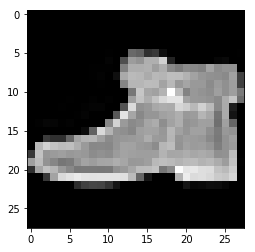

In [9]:
plt.imshow(sample_img)

In [10]:
#Read train.csv
train_data = pd.read_csv('train_images/train.csv')

In [11]:
train_data.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [12]:
TRAIN_DATASET_SIZE = int(len(images) * 0.8)
CV_DATASET_SIZE    = int(len(images) * 0.1)
TEST_DATASET_SIZE  = int(len(images) * 0.1)

In [13]:
print(TRAIN_DATASET_SIZE)
print(CV_DATASET_SIZE)
print(TEST_DATASET_SIZE)

48000
6000
6000


In [14]:
images_shuffled = np.random.shuffle(images)

In [15]:
sample_image = os.path.basename(images[10]).split('.')[0]
sample_label = train_data[train_data['id'] == int(sample_image)]

In [16]:
print(sample_image)

15786


In [17]:
sample_label

,id,label
15785,15786,5


## Load Data

In [27]:
def load_images_for_training():
    '''
        Read and return images in train images and their corresponding labels
    '''
    x_train = []
    x_cv    = []
    x_test  = []
    
    y_train = []
    y_cv    = []
    y_test  = []
    
    IMG_HEIGHT = 128
    IMG_WIDTH  = 128
    
    num_images_loaded = 0;
    
    #load train data
    for img in images[:TRAIN_DATASET_SIZE]:
        train_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        train_label = train_data[train_data['id'] == int(img_name)]['label'].values[0]
        
        #x_train.append(cv.resize(train_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        x_train.append(train_img)
        y_train.append(train_label)
        
        num_images_loaded += 1
        
        if(num_images_loaded % 1000 == 0):
            print('{} training images loaded'.format(num_images_loaded))
        
    print('-------------------------Loaded training dataset-------------------------------')
    
    num_images_loaded = 0;
    
    #load cross validation data
    for img in images[TRAIN_DATASET_SIZE:TRAIN_DATASET_SIZE+CV_DATASET_SIZE]:
        cv_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        cv_label = train_data[train_data['id'] == int(img_name)]['label'].values[0]
        
        #x_cv.append(cv.resize(cv_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        x_cv.append(cv_img)
        y_cv.append(cv_label)
        
        num_images_loaded += 1
        
        if(num_images_loaded % 1000 == 0):
            print('{} cross validation images loaded'.format(num_images_loaded))
        
    print('-------------------------Loaded cross validation dataset-------------------------------')
    
    num_images_loaded = 0;
    
    #load test data
    for img in images[TRAIN_DATASET_SIZE+CV_DATASET_SIZE:]:
        test_img = cv.imread(img)
        img_name = os.path.basename(img).split('.')[0]
        test_label = train_data[train_data['id'] == int(img_name)]['label'].values[0]
        
        #x_test.append(cv.resize(test_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        x_test.append(test_img)
        y_test.append(test_label)
        
        num_images_loaded += 1
        
        if(num_images_loaded % 1000 == 0):
            print('{} testing images loaded'.format(num_images_loaded))
        
    print('-------------------------Loaded testing dataset-------------------------------')
        
    return x_train, y_train, x_cv, y_cv, x_test, y_test

In [28]:
x_train, y_train, x_cv, y_cv, x_test, y_test  = load_images_for_training()

1000 training images loaded
2000 training images loaded
3000 training images loaded
4000 training images loaded
5000 training images loaded
6000 training images loaded
7000 training images loaded
8000 training images loaded
9000 training images loaded
10000 training images loaded
11000 training images loaded
12000 training images loaded
13000 training images loaded
14000 training images loaded
15000 training images loaded
16000 training images loaded
17000 training images loaded
18000 training images loaded
19000 training images loaded
20000 training images loaded
21000 training images loaded
22000 training images loaded
23000 training images loaded
24000 training images loaded
25000 training images loaded
26000 training images loaded
27000 training images loaded
28000 training images loaded
29000 training images loaded
30000 training images loaded
31000 training images loaded
32000 training images loaded
33000 training images loaded
34000 training images loaded
35000 training images l

In [29]:
test_images = os.path.join(curDir,'test_Images/test')

In [30]:
test_imgs = glob(os.path.join(test_images, "*.png"))

In [75]:
def load_test_images():
    '''
        Read images in test images and return the list
    '''
    x = []
    img_name_lst = []
    
    IMG_HEIGHT = 128
    IMG_WIDTH  = 128
    
    for img in test_imgs:
        test_img = cv.imread(img)
        #x.append(cv.resize(test_img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv.INTER_CUBIC))
        x.append(test_img)
        img_name = os.path.basename(img).split('.')[0]
        img_name_lst.append(int(img_name))
        
        num_images_loaded = 0
        num_images_loaded += 1
        
        if(num_images_loaded % 1000 == 0):
            print('{} testing set images loaded'.format(num_images_loaded))
            
        
        
    print('-------------------------Loaded testing dataset-------------------------------')
        
    return x, img_name_lst

In [76]:
test_x,img_name_lst = load_test_images()

-------------------------Loaded testing dataset-------------------------------


In [35]:
#save the data as numpy arrays
np.save("tmp/Train_image_data",x_train)
np.save("tmp/Train_label_data",y_train)

#save cv data
np.save("tmp/cv_image_data",x_cv)
np.save("tmp/cv_label_data",y_cv)

#save test data
np.save("tmp/Test_image_data",x_test)
np.save("tmp/Test_label_data",y_test)

## Training

In [36]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


In [37]:
def identity_block(X,f,filters,stage,block):
    '''
        Method for identity block used in ResNet

        Parameters:
        X       -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
        f       -- integer, specifying the shape of the middle CONV's window for the main path
        filters -- python list of integers, defining the number of filters in the CONV layers of the main path
        stage   -- integer, used to name the layers, depending on their position in the network
        block   -- string/character, used to name the layers, depending on their position in the network

        Returns:
        X       -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    '''
    conv_name_base = 'res'+str(stage)+block+'_branch'
    bn_name_base   = 'bn'+str(stage)+block+'_branch'
    
    F1,F2,F3 = filters
    X_shortcut = X
    
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(1,1),padding='valid',name=conv_name_base+'2a',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2,kernel_size=(f,f),strides=(1,1),padding='same',name=conv_name_base+'2b',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F3,kernel_size=(1,1),strides=(1,1),padding='valid',name=conv_name_base+'2c',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+'2c')(X)
    
    X = Add()([X_shortcut,X])
    X = Activation('relu')(X)
    
    return X

In [38]:
def convolutional_block(X,f,filters,stage,block,strides=2):
    
    '''
    Implementation of the convolutional block
    
    Parameters:
    X       -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f       -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage   -- integer, used to name the layers, depending on their position in the network
    block   -- string/character, used to name the layers, depending on their position in the network
    strides -- Integer, specifying the stride to be used
    
    Returns:
    X       -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    '''
    
    conv_name_base = 'res'+str(stage)+block+'_branch'
    bn_name_base   = 'bn'+str(stage)+block+'_branch'
    
    F1,F2,F3 = filters
    X_shortcut = X
    
    X = Conv2D(F1, (1, 1), strides = (strides,strides), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(F2, (f, f), strides = (1,1), name = conv_name_base + '2b', padding='same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X_shortcut = Conv2D(F3, (1, 1), strides = (strides,strides), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Add()([X_shortcut,X])
    X = Activation('relu')(X)
    
    return X

In [54]:
def ResNet50(input_shape=(28,28,3),classes=10):
    
    """
    Implementation of the ResNet50. Following is the architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Parameters:
    input_shape -- shape of the images of the dataset
    classes     -- integer, number of classes

    Returns:
    model       -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(28, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', strides = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', strides = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', strides = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', strides = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(1, 1),name='avg_pool',dim_ordering='th')(X)
    
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [55]:
#Build model graph
model = ResNet50(input_shape = (28, 28, 3), classes = 10)

C:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(1, 1), name="avg_pool", data_format="channels_first")`


In [56]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
#Load data
X_train = np.load('tmp/Train_image_data.npy')
Y_train = np.load('tmp/Train_label_data.npy')

X_cv = np.load('tmp/cv_image_data.npy')
Y_cv = np.load('tmp/cv_label_data.npy')

X_test = np.load('tmp/Test_image_data.npy')
Y_test = np.load('tmp/Test_label_data.npy')

In [43]:
#Method to convert labels to one-hot encoding
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [44]:
#Convert labels to one-hot encoding
Y_train = convert_to_one_hot(Y_train, 10).T
Y_cv = convert_to_one_hot(Y_cv, 10).T
Y_test = convert_to_one_hot(Y_test, 10).T

In [45]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 48000
number of test examples = 6000
X_train shape: (48000, 28, 28, 3)
Y_train shape: (48000, 10)
X_test shape: (6000, 28, 28, 3)
Y_test shape: (6000, 10)


In [58]:
#Train the model - currently training on 10 epochs only
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
48000/48000 [==============================] - 347s 7ms/step - loss: 0.2791 - acc: 0.8984
Epoch 2/10
48000/48000 [==============================] - 347s 7ms/step - loss: 0.2525 - acc: 0.9067
Epoch 3/10
48000/48000 [==============================] - 340s 7ms/step - loss: 0.2934 - acc: 0.8918
Epoch 4/10
48000/48000 [==============================] - 339s 7ms/step - loss: 0.2455 - acc: 0.9069
Epoch 5/10
48000/48000 [==============================] - 339s 7ms/step - loss: 0.2232 - acc: 0.9168
Epoch 6/10
48000/48000 [==============================] - 381s 8ms/step - loss: 0.2070 - acc: 0.9228
Epoch 7/10
48000/48000 [==============================] - 371s 8ms/step - loss: 0.1964 - acc: 0.9250
Epoch 8/10
48000/48000 [==============================] - 366s 8ms/step - loss: 0.3176 - acc: 0.9100
Epoch 9/10
48000/48000 [==============================] - 353s 7ms/step - loss: 0.3572 - acc: 0.8948
Epoch 10/10
48000/48000 [==============================] - 339s 7ms/step - loss: 0.2061 - a

In [60]:
#Save the model for future use
model.save('tmp/Model/apparel_classifier.h5')

In [61]:
#Load the model
reload_model = load_model('tmp/Model/apparel_classifier.h5')

## Evaluation

In [62]:
#Evaluate the model on cross validation set
preds = model.evaluate(X_cv,Y_cv)

6000/6000 [==============================] - 14s 2ms/step


In [63]:
#Print the loss of cross validation set
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 0.31253336504101753
Test Accuracy = 0.903


In [88]:
#Evaluate the model on test set
preds_test = reload_model.evaluate(X_test,Y_test)

6000/6000 [==============================] - 14s 2ms/step


In [89]:
#Print the loss of test set
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

Loss = 0.3361488898595174
Test Accuracy = 0.8973333333333333


In [77]:
#Convert submission images data to numpy array from list
test_x_np = np.asarray(test_x)

In [78]:
test_x_np.shape

(10000, 28, 28, 3)

In [79]:
#Predit on submission image data
test_predictions = model.predict(test_x_np)

In [82]:
#Take argmax to get the highest probable class as the predictions will have probability of 10 classes
test_preds = test_predictions.argmax(axis=1)

## Submission

In [83]:
#Create a data frame for submission
submission_df = pd.DataFrame()

In [84]:
submission_df['id']    = img_name_lst
submission_df['label'] = test_preds

In [85]:
submission_df.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [87]:
submission_df.to_csv('submission.csv',index=False)